## Import

In [24]:
import pandas as pd

In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [29]:
from skopt import BayesSearchCV

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
import pickle

## Data

In [32]:
# import data
df = pd.read_csv("laptop_prices.csv")
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [33]:
# change column nanme for convinence
df.rename(columns={ "RAM (GB)": "RAM", 
           "Screen Size (inch)": "Screen Size", 
           "Battery Life (hours)": "Battery Life",
           "Weight (kg)": "Weight",
           "Price ($)": "Price"
          }, inplace=True)

df.head()

,Brand,Processor,RAM,Storage,GPU,Screen Size,Resolution,Battery Life,Weight,Operating System,Price
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [34]:
df.shape

(11768, 11)

In [35]:
# function to calculate average price of each unique values from a certain column
def calculate_avg_price_from_column(column_name):
    unique_values = df[column_name].unique()
    
    # sort if it's numerical
    if(unique_values.dtype == "int64" or unique_values.dtype == "float64"):
        unique_values = np.sort(unique_values)
    
    avg_prices = []
    
    for value in unique_values:
        avg = df[df[column_name] == value]["Price"].mean() # average prices of each value
        avg_prices.append(avg)
        
    return (unique_values, np.array(avg_prices))
    
calculate_avg_price_from_column("Operating System")

(array(['FreeDOS', 'Linux', 'Windows', 'macOS'], dtype=object),
 array([2189.94980014, 2178.74263408, 2181.01475288, 2184.58350137]))

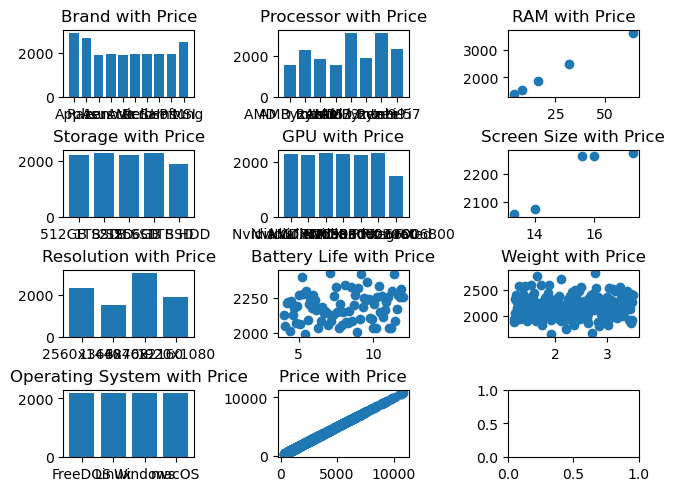

In [36]:
# see all the plots

width = 3
height = 4

fig, axes = plt.subplots(height, width, layout="constrained")

for i in range(len(df.columns)):
    column = df.columns[i]
    axe = axes.flat[i]
    
    # scatter plot for numerical data
    if (df[column].dtype == "int64" or df[column].dtype == "float64"):
        uniques, avg = calculate_avg_price_from_column(column)
        axe.scatter(uniques, avg)
        axe.set_title(column + " with Price")
    
    # bar plot for categorical data
    else:
        uniques, avg = calculate_avg_price_from_column(column)
        axe.bar(uniques, avg)
        axe.set_title(column + " with Price")


# margin = 100
# plt.subplots_adjust(top = margin, bottom=margin-1, left=margin-1, right=margin)
# plt.tight_layout()
plt.show()

In [37]:
column = "Operating System"
print(df[column].unique())

['FreeDOS' 'Linux' 'Windows' 'macOS']


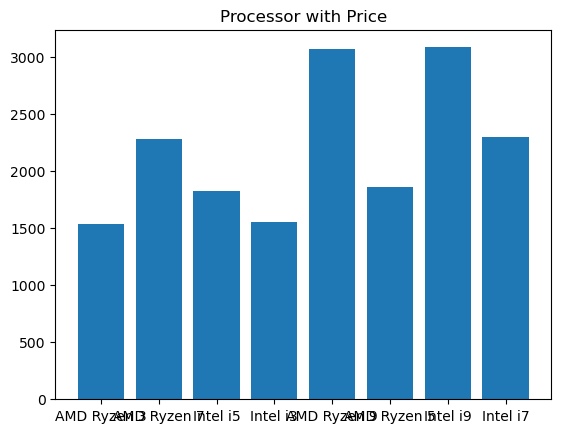

In [38]:
# look at indiviual column
column = "Processor"

# scatter plot for numerical data
if (df[column].dtype == "int64" or df[column].dtype == "float64"):
    uniques, avg = calculate_avg_price_from_column(column)
    plt.scatter(uniques, avg)
    plt.title(column + " with Price")
    
# bar plot for categorical data
else:
    uniques, avg = calculate_avg_price_from_column(column)
    plt.bar(uniques, avg)
    plt.title(column + " with Price")

In [39]:
df.head()

,Brand,Processor,RAM,Storage,GPU,Screen Size,Resolution,Battery Life,Weight,Operating System,Price
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [40]:
# Encoder
brand_encoder = LabelEncoder()
processor_encoder = LabelEncoder()
storage_encoder = LabelEncoder()
gpu_encoder = LabelEncoder()
resolution_encoder = LabelEncoder()
system_encoder = LabelEncoder()

# Enocde
df["Brand"] = brand_encoder.fit_transform(df["Brand"])
df["Processor"] = processor_encoder.fit_transform(df["Processor"])
df["Storage"] = storage_encoder.fit_transform(df["Storage"])
df["GPU"] = gpu_encoder.fit_transform(df["GPU"])
df["Resolution"] = resolution_encoder.fit_transform(df["Resolution"])
df["Operating System"] = system_encoder.fit_transform(df["Operating System"])

df.head()

,Brand,Processor,RAM,Storage,GPU,Screen Size,Resolution,Battery Life,Weight,Operating System,Price
0,1,0,64,4,3,17.3,2,8.9,1.42,0,3997.07
1,8,2,4,1,6,14.0,0,9.4,2.57,1,1355.78
2,2,5,32,3,5,13.3,3,8.5,1.74,0,2673.07
3,5,5,4,2,6,13.3,0,10.5,3.10,2,751.17
4,8,4,4,2,0,16.0,3,5.7,3.38,1,2059.83


In [41]:
df.dtypes

Brand                 int32
Processor             int32
RAM                   int64
Storage               int32
GPU                   int32
Screen Size         float64
Resolution            int32
Battery Life        float64
Weight              float64
Operating System      int32
Price               float64
dtype: object

In [42]:
# change type to categorical
df["Brand"] = df["Brand"].astype("category")
df["Processor"] = df["Processor"].astype("category")
df["Storage"] = df["Storage"].astype("category")
df["GPU"] = df["GPU"].astype("category")
df["Resolution"] = df["Resolution"].astype("category")
df["Operating System"] = df["Operating System"].astype("category")

df.dtypes

Brand               category
Processor           category
RAM                    int64
Storage             category
GPU                 category
Screen Size          float64
Resolution          category
Battery Life         float64
Weight               float64
Operating System    category
Price                float64
dtype: object

## Model

In [43]:
X = df.drop(columns=["Price"])
X.head()

,Brand,Processor,RAM,Storage,GPU,Screen Size,Resolution,Battery Life,Weight,Operating System
0,1,0,64,4,3,17.3,2,8.9,1.42,0
1,8,2,4,1,6,14.0,0,9.4,2.57,1
2,2,5,32,3,5,13.3,3,8.5,1.74,0
3,5,5,4,2,6,13.3,0,10.5,3.10,2
4,8,4,4,2,0,16.0,3,5.7,3.38,1


In [44]:
y = df["Price"]
y.head()

0    3997.07
1    1355.78
2    2673.07
3     751.17
4    2059.83
Name: Price, dtype: float64

In [45]:
X.shape

(11768, 10)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
X_train

,Brand,Processor,RAM,Storage,GPU,Screen Size,Resolution,Battery Life,Weight,Operating System
2241,0,6,32,3,0,13.3,2,9.0,1.71,1
5794,1,7,64,3,3,15.6,1,4.8,2.94,3
297,7,6,16,4,0,13.3,3,8.2,3.22,0
10816,1,2,32,0,0,15.6,1,10.5,2.02,3
2950,2,2,8,1,4,16.0,1,4.9,1.81,1
...,...,...,...,...,...,...,...,...,...,...
11412,1,3,16,3,2,15.6,3,7.9,1.46,1
1394,2,0,32,3,1,13.3,2,5.7,2.08,1
4792,0,4,8,3,5,13.3,3,4.4,2.22,0
6570,9,1,8,2,6,16.0,0,8.8,1.28,1


In [48]:
X_test

,Brand,Processor,RAM,Storage,GPU,Screen Size,Resolution,Battery Life,Weight,Operating System
7247,8,1,16,1,1,13.3,3,8.3,2.03,1
10312,9,1,16,4,0,14.0,2,5.2,2.77,2
3885,4,2,64,2,6,16.0,3,8.8,1.22,1
5061,7,5,64,2,5,13.3,3,6.8,1.55,0
2132,9,1,8,3,1,13.3,2,5.3,2.73,3
...,...,...,...,...,...,...,...,...,...,...
7071,4,6,4,2,3,16.0,2,4.0,2.64,0
8428,1,0,32,0,5,16.0,0,4.4,1.52,2
9545,7,5,4,2,3,15.6,2,9.1,3.04,2
8787,8,3,8,2,1,16.0,3,9.6,1.39,3


In [49]:
# Bayes Search For the best parameter
# param_space = {
#     "n_estimators": [300, 400, 500],
#     "max_features": [3, 5, 7],
#     "max_samples": [2000, 6000, 7000]
# }

# model = RandomForestRegressor(oob_score=True)
# model_cv = BayesSearchCV(model, param_space, n_iter=30)

# model_cv.fit(X_train, y_train)

In [50]:
# # Grid Search For the best parameter
# param_grid = {
#     "n_estimators": [300, 400, 500],
#     "max_features": [3, 5, 7],
#     "max_samples": [2000, 6000, 7000]
# }

# model = RandomForestRegressor(oob_score=True)
# model_cv = RandomizedSearchCV(model, param_grid)

# model_cv.fit(X_train, y_train)

In [51]:
# print("Best Param:", model_cv.best_params_)
# print("Best Score:", model_cv.best_score_)

In [52]:
# Training Model!!!
model = RandomForestRegressor(n_estimators=300, max_features=7, max_samples=6000, oob_score=True)
model.fit(X_train, y_train)

RandomForestRegressor(max_features=7, max_samples=6000, n_estimators=300,
                      oob_score=True)

## Evaluation

In [53]:
model.oob_score_

0.8931466643839743

In [54]:
model.feature_importances_

array([0.05485017, 0.20511026, 0.3910453 , 0.02090827, 0.03437593,
       0.01738858, 0.20540305, 0.0287326 , 0.03119548, 0.01099037])

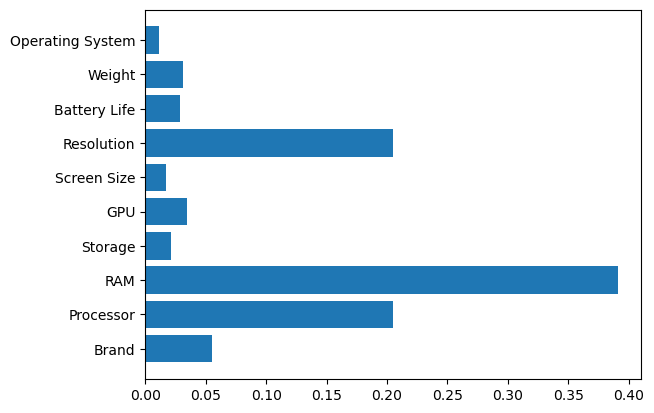

In [55]:
plt.barh(model.feature_names_in_, model.feature_importances_)
plt.show()

In [56]:
y_pred = model.predict(X_test)
y_pred

array([2133.1481    , 1691.98026667, 5813.07206667, ..., 1296.87283333,
       3369.2047    , 2329.613     ])

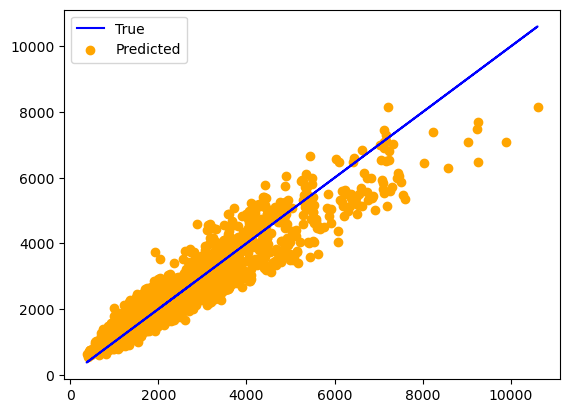

In [57]:
# plot compare y_pred and y_test
plt.plot(y_test, y_test, label="True", color="blue")
plt.scatter(y_test, y_pred, label="Predicted", color="orange")
plt.legend()
plt.show()

In [58]:
print("MAE =", mean_absolute_error(y_test, y_pred))
print("MSE =", mean_squared_error(y_test, y_pred))
print("RMSE =", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE = 295.3646116474053
MSE = 182676.84705138652
RMSE = 427.4071209647618


In [64]:
brand = brand_encoder.transform(np.array(["Apple"]))[0]
processor = processor_encoder.transform(np.array(["Intel i5"]))[0]
ram = 16
storage = storage_encoder.transform(np.array(["2TB SSD"]))[0]
gpu = gpu_encoder.transform(np.array(["Integrated"]))[0]
screen_size = 15.0
resolution = resolution_encoder.transform(np.array(["1920x1080"]))[0]
battery_life = 15
weight = 1.5
system = system_encoder.transform(np.array(["Windows"]))[0]

data = np.array([brand, processor, ram, storage, gpu, screen_size, resolution, battery_life, weight, system]).reshape(1, -1)

print(round(model.predict(data)[0], 2))

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1316.44


## Deploy

In [59]:
# dump model
# with open("model.pkl", "wb") as f:
#     pickle.dump(model, f)

In [60]:
# dump label encoders
# with open("brand_encoder.pkl", "wb") as f:
#     pickle.dump(brand_encoder, f)

# with open("processor_encoder.pkl", "wb") as f:
#     pickle.dump(processor_encoder, f)
    
# with open("storage_encoder.pkl", "wb") as f:
#     pickle.dump(storage_encoder, f)
    
# with open("gpu_encoder.pkl", "wb") as f:
#     pickle.dump(gpu_encoder, f)
    
# with open("resolution_encoder.pkl", "wb") as f:
#     pickle.dump(resolution_encoder, f)
    
# with open("system_encoder.pkl", "wb") as f:
#     pickle.dump(system_encoder, f)